# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
#from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

c:\users\binoop pulikkal\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


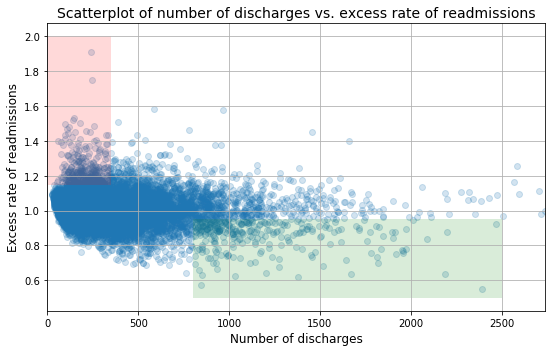

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [7]:
#Replace missing values with zero
clean_hospital_read_df.loc[clean_hospital_read_df['Number of Readmissions'].isna(),'Number of Readmissions']=0
clean_hospital_read_df.loc[clean_hospital_read_df['Expected Readmission Rate'].isna(),'Expected Readmission Rate']=0
clean_hospital_read_df.loc[clean_hospital_read_df['Predicted Readmission Rate'].isna(),'Predicted Readmission Rate']=0
clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'].isna(),'Excess Readmission Ratio']=0

In [8]:
#Exclude records with number of discharges =0
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]

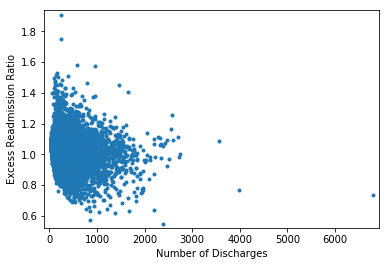

In [9]:
#plot relationship between Number of Discharges and Excess Readmission Ratio
_ = plt.plot(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio']
             , marker='.', linestyle='none')
# Set margins
_ = plt.margins(.02)
# Label the axes
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')

plt.show()

In [10]:
#Find correlation
for f in ['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate'
          ,'Number of Readmissions']:
    for g in ['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate'
          ,'Number of Readmissions']:
        if (f < g):
            #if (np.corrcoef(clean_hospital_read_df[f],clean_hospital_read_df[g])[0,1] >= 0.5 or np.corrcoef(clean_hospital_read_df[f],clean_hospital_read_df[g])[0,1] <= -0.5):
            print('Correlation (',f,',',g,') {:.2f}'.format(np.corrcoef(clean_hospital_read_df[f],clean_hospital_read_df[g])[0,1]))

Correlation ( Number of Discharges , Predicted Readmission Rate ) -0.14
Correlation ( Number of Discharges , Number of Readmissions ) 0.79
Correlation ( Excess Readmission Ratio , Number of Discharges ) -0.10
Correlation ( Excess Readmission Ratio , Predicted Readmission Rate ) 0.20
Correlation ( Excess Readmission Ratio , Expected Readmission Rate ) -0.03
Correlation ( Excess Readmission Ratio , Number of Readmissions ) 0.12
Correlation ( Expected Readmission Rate , Number of Discharges ) -0.13
Correlation ( Expected Readmission Rate , Predicted Readmission Rate ) 0.97
Correlation ( Expected Readmission Rate , Number of Readmissions ) 0.33
Correlation ( Number of Readmissions , Predicted Readmission Rate ) 0.36


In [11]:
#Add a category column for Number of Discharges
def conditions(s):
    if s['Number of Discharges'] < 100:
        return 'Less than 100'
    elif s['Number of Discharges'] <= 1000:
        return 'Between 100 and 1000'
    else:
        return 'Greater than 1000'

    
clean_hospital_read_df['NumberofDischargessCat'] = clean_hospital_read_df.apply(conditions, axis=1)

In [12]:
clean_hospital_read_df1=clean_hospital_read_df.drop(['Hospital Name','Measure Name','Number of Discharges','Provider Number'
                                                     ,'State','Footnote','Predicted Readmission Rate'
                                                     ,'Expected Readmission Rate','Number of Readmissions','Start Date'
                                                     ,'End Date'], axis=1)

In [13]:
clean_hospital_read_df1.rename(index=str, columns={"Excess Readmission Ratio":"ExcessReadmissionRatio"}, inplace=True)

In [14]:
#Null hypothesis: The excess readmission ratio is identiacal for all number of discharge categories
# Alpha=0.01
formula = 'ExcessReadmissionRatio ~ C(NumberofDischargessCat)'
model = ols(formula, clean_hospital_read_df1).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     ExcessReadmissionRatio   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     39.72
Date:                    Mon, 30 Jul 2018   Prob (F-statistic):           6.46e-18
Time:                            12:04:50   Log-Likelihood:                 11162.
No. Observations:                   11497   AIC:                        -2.232e+04
Df Residuals:                       11494   BIC:                        -2.230e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

* We can reject the null hypothesis and there is a siginificant difference in readmission rate between hospitals with less than 100 discharges and those with more than 1,000 discharges

In [15]:
# Check which groups/categoroes are significantly different 
mc1 = multi.MultiComparison(clean_hospital_read_df1['ExcessReadmissionRatio'],clean_hospital_read_df1['NumberofDischargessCat'])
res1 = mc1.tukeyhsd(alpha=0.01)
print(res1.summary())

          Multiple Comparison of Means - Tukey HSD,FWER=0.01         
       group1              group2      meandiff  lower  upper  reject
---------------------------------------------------------------------
Between 100 and 1000 Greater than 1000 -0.0287  -0.0414 -0.016  True 
Between 100 and 1000   Less than 100    0.0156   0.0074 0.0238  True 
 Greater than 1000     Less than 100    0.0443   0.0296 0.0589  True 
---------------------------------------------------------------------


* All 3 groups are significantly different from others

#### Part A:
* Don't agree with these observations
* The plot above suggests some sort of correlation between Number of discharges and Excess readmissions rate; but the correaltion coefficent of -0.1 suggests there is very little
* So we cant use change in number of discharges to say whether the rate of readmissions will go up or down

#### Part B:
* This is fine, as both statements are factually correct
* We proved that there is a statistically significant difference in excess readmission rate between hospitals with number of dicharges less than 100 and those with more than 1,000
* However, this doesnt mean that there exisit a strong correlation between number of discharges and readmission rates. There are many hospitals that have high disharges and also high readmisison ratio.

#### Part C:
* Don't agree with this conclusion, as we have proved that there was not enough correlation between number of discharges and rate of readmissions (Correlation coefficient of -0.1)
* We dont have enough evidence to suggest that smaller hospitals are lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. 

#### Part D:
* Agree with the first recommendation. Not only small; but all hospitals should be required to demonstrate upgraded resource allocation for quality care to continue operation.
* Do not agree with the second recommendation, as we have proved that there was not enough correlation between number of discharges and rate of readmissions (Correlation coefficient of -0.1)

In [16]:
#Add a category column for Readmission Ratio
def condition(s):
    if s['Excess Readmission Ratio'] > 1:
        return 'Excess'
    else:
        return 'Not_Excess'
    
clean_hospital_read_df['Excess_Flag'] = clean_hospital_read_df.apply(condition, axis=1)

In [17]:
# Create a dataframe of hostels and their readmission rates
hospitals = clean_hospital_read_df.groupby(['Hospital Name','Excess_Flag'],as_index=False)['Provider Number'].count()
hospitals = hospitals.pivot(index='Hospital Name',columns='Excess_Flag', values='Provider Number')
hospitals.loc[hospitals['Excess'].isna(),'Excess']=0
hospitals.loc[hospitals['Not_Excess'].isna(),'Not_Excess']=0
hospitals['Total']= hospitals['Excess'] + hospitals['Not_Excess']
hospitals['Percent_of_Excess']= (hospitals['Excess'] / hospitals['Total']) * 100

In [18]:
hospitals.head()

Excess_Flag,Excess,Not_Excess,Total,Percent_of_Excess
Hospital Name,,,,
ABBEVILLE GENERAL HOSPITAL,3.0,0.0,3.0,100.000000
ABBOTT NORTHWESTERN HOSPITAL,1.0,4.0,5.0,20.000000
ABILENE REGIONAL MEDICAL CENTER,1.0,3.0,4.0,25.000000
ABINGTON MEMORIAL HOSPITAL,3.0,2.0,5.0,60.000000
ACADIA GENERAL HOSPITAL,2.0,1.0,3.0,66.666667


In [19]:
print('Total number of hospitals', len(hospitals['Percent_of_Excess']))

print((np.sum(hospitals['Percent_of_Excess'] >= 80) /len(hospitals['Percent_of_Excess']))*100,'percent of hospitals ('
      ,np.sum(hospitals['Percent_of_Excess'] >= 80),') have 80% or more excess readmission rates')

print((np.sum(hospitals['Percent_of_Excess'] >= 50) /len(hospitals['Percent_of_Excess']))*100,'percent of hospitals ('
      ,np.sum(hospitals['Percent_of_Excess'] >= 50),') have 50% or more excess readmission rates')

Total number of hospitals 2879
26.71066342480028 percent of hospitals ( 769 ) have 80% or more excess readmission rates
55.57485237929837 percent of hospitals ( 1600 ) have 50% or more excess readmission rates


__Recommendation__
* It will be more effective to target those hospitals with high excess readmisison ratios (for example more than 80%) and work with those individual hospitals to understand what is really causing the excess readmisison rates. 
* We need more data to really develop some insights to the casues of high readmisison rates
* Device action plan based on the findings and track the improvements in the readmisison rates
* See if the learnings & action plan can be extended to similar type of hospitals 